In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('Bitcoin Historical Data0330.csv')

df['Date'] = pd.to_datetime(df['Date'])

df1 = df.set_index(['Date'])
#df1 = df1.loc[:, ['Price']]
df1['Price'] = df1['Price'].str.replace(',', '').astype('float')
df1['Open'] = df1['Open'].str.replace(',', '').astype('float')
df1['High'] = df1['High'].str.replace(',', '').astype('float')
df1['Low'] = df1['Low'].str.replace(',', '').astype('float')
df1['Change %'] = df1['Change %'].str.replace('%', '').astype('float')

for i in range(len(list(df1['Vol.']))):
    if list(df1['Vol.'])[i].endswith('K'):
        temp = list(df1['Vol.'])[i].replace('K', '')
        df1['Vol.'][i] = float(temp) * 1000
    else:
        temp2 = list(df1['Vol.'])[i].replace('M', '')
        df1['Vol.'][i] = float(temp2) * 1000000
        
df1['Vol.'] = df1['Vol.'].astype('int')

#df1.reset_index(inplace=True)

df1 = df1.loc[::-1]
#df1 = df1.set_index(['Date'])
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-01,314.9,318.2,321.4,313.5,12820,-1.05
2015-01-02,315.2,314.9,316.4,313.1,14730,0.10
2015-01-03,287.1,315.2,315.8,284.9,47370,-8.91
2015-01-04,264.7,287.1,289.9,255.9,88770,-7.80
2015-01-05,274.8,264.7,278.3,262.9,54990,3.82
...,...,...,...,...,...,...
2021-03-26,55036.1,51317.4,55074.1,51302.0,100300,7.24
2021-03-27,55862.9,55033.8,56531.1,54010.2,73870,1.50
2021-03-28,55765.2,55856.9,56504.2,54711.3,58710,-0.17


In [3]:
df1.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.          int32
Change %    float64
dtype: object

In [4]:
df_p = df1.loc[:, ['Price']]

In [5]:
kospi= fdr.DataReader("KS11","2015")
sp = fdr.DataReader("US500","2015")

code_list = ["KS11","US500"]
index_list = [fdr.DataReader(code, "2015")["Close"] for code in code_list]
ks_sp =pd.concat(index_list,axis=1)

ks_sp.columns = code_list
ks_sp.columns

ks_sp.dropna()

,KS11,US500
Date,,
2015-01-02,1926.44,2058.20
2015-01-05,1915.75,2020.58
2015-01-06,1882.45,2002.61
2015-01-07,1883.83,2025.90
2015-01-08,1904.65,2062.14
...,...,...
2021-03-23,3004.74,3910.52
2021-03-24,2996.35,3889.14
2021-03-25,3008.33,3909.52


In [6]:
coin = pd.DataFrame(df1['Change %'])
coin.columns = ['Bitcoin']
ks_sp_coin_price = pd.concat([ks_sp, coin], axis=1)
ks_sp_coin_price

,KS11,US500,Bitcoin
Date,,,
2015-01-01,NaN,NaN,-1.05
2015-01-02,1926.44,2058.20,0.10
2015-01-03,NaN,NaN,-8.91
2015-01-04,NaN,NaN,-7.80
2015-01-05,1915.75,2020.58,3.82
...,...,...,...
2021-03-26,3041.01,3974.54,7.24
2021-03-27,NaN,NaN,1.50
2021-03-28,NaN,NaN,-0.17


In [7]:
ks_sp_coin_price_drop = ks_sp_coin_price.dropna()
ks_sp_coin_price_drop

,KS11,US500,Bitcoin
Date,,,
2015-01-02,1926.44,2058.20,0.10
2015-01-05,1915.75,2020.58,3.82
2015-01-06,1882.45,2002.61,2.70
2015-01-07,1883.83,2025.90,3.21
2015-01-08,1904.65,2062.14,-2.97
...,...,...,...
2021-03-23,3004.74,3910.52,0.54
2021-03-24,2996.35,3889.14,-3.91
2021-03-25,3008.33,3909.52,-1.92


In [8]:
ks_sp_coin_price_drop['KS11'] = round(ks_sp_coin_price_drop['KS11'].pct_change() * 100, 3)
ks_sp_coin_price_drop['US500'] = round(ks_sp_coin_price_drop['US500'].pct_change() * 100, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
ks_sp_coin_price_drop = ks_sp_coin_price_drop.dropna()
ks_sp_coin_price_drop

,KS11,US500,Bitcoin
Date,,,
2015-01-05,-0.555,-1.828,3.82
2015-01-06,-1.738,-0.889,2.70
2015-01-07,0.073,1.163,3.21
2015-01-08,1.105,1.789,-2.97
2015-01-09,1.053,-0.840,1.87
...,...,...,...
2021-03-23,-1.012,-0.763,0.54
2021-03-24,-0.279,-0.547,-3.91
2021-03-25,0.400,0.524,-1.92


In [168]:
ks_sp_coin_price1 = ks_sp_coin_price_drop.loc['2015-01-01':'2017-10-31']
ks_sp_coin_price2 = ks_sp_coin_price_drop.loc['2017-11-01':'2019-12-31']
ks_sp_coin_price3 = ks_sp_coin_price_drop.loc['2020-01-01':'2021-03-30']

In [169]:
adfuller_test = adfuller(ks_sp_coin_price1['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -25.86954788180757
p-value: 0.0


In [170]:
adfuller_test = adfuller(ks_sp_coin_price1['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -15.131644035819775
p-value: 7.217581038203577e-28


In [171]:
adfuller_test = adfuller(ks_sp_coin_price1['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -20.73241883029436
p-value: 0.0


In [172]:
mydata_diff1 = ks_sp_coin_price1.diff().dropna()

In [173]:
mydata_diff1

,KS11,US500,Bitcoin
Date,,,
2015-01-06,-1.183,0.939,-1.12
2015-01-07,1.811,2.052,0.51
2015-01-08,1.032,0.626,-6.18
2015-01-09,-0.052,-2.629,4.84
2015-01-12,-1.248,0.031,-0.15
...,...,...,...
2017-10-25,0.063,-0.628,10.63
2017-10-26,-0.557,0.593,-1.33
2017-10-27,1.121,0.680,-4.77


In [174]:
adfuller_test = adfuller(mydata_diff1['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.656668908517373
p-value: 1.9778772018459484e-21


In [175]:
adfuller_test = adfuller(mydata_diff1['US500'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.904206578687537
p-value: 5.484712698105011e-22


In [176]:
adfuller_test = adfuller(mydata_diff1['Bitcoin'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.689092661316378
p-value: 1.669411262931339e-21


In [177]:
mydata_diff2 = mydata_diff1.loc[:, ['KS11', 'Bitcoin']]

In [178]:
train = mydata_diff2.iloc[:-10,:]
test = mydata_diff2[-10:]

In [179]:
train

,KS11,Bitcoin
Date,,
2015-01-06,-1.183,-1.12
2015-01-07,1.811,0.51
2015-01-08,1.032,-6.18
2015-01-09,-0.052,4.84
2015-01-12,-1.248,-0.15
...,...,...
2017-10-11,-0.643,1.58
2017-10-12,-0.325,11.33
2017-10-13,-0.721,-8.84


In [185]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


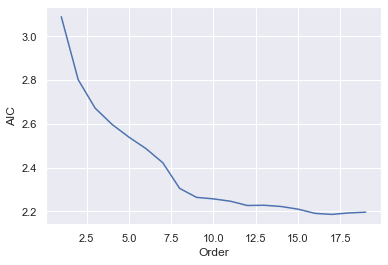

In [186]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [187]:
results = forecasting_model.fit(16)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:22:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.64701
Nobs:                     647.000    HQIC:                   2.36778
Log likelihood:          -2478.83    FPE:                    8.94384
AIC:                      2.19079    Det(Omega_mle):         8.09682
--------------------------------------------------------------------
Results for equation KS11
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000985         0.029898            0.033           0.974
L1.KS11            -0.947502         0.040270          -23.529           0.000
L1.Bitcoin          0.010295         0.008115            1.269       

In [188]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realKS11_1d', 'realBIT_1d'])
forecast

,realKS11_1d,realBIT_1d
Date,,
2017-10-18,0.099672,6.726185
2017-10-19,-0.046145,0.927689
2017-10-20,-0.356332,-4.231940
2017-10-23,0.253958,0.446081
2017-10-24,-0.133089,0.230755
2017-10-25,-0.238048,0.790685
2017-10-26,0.700103,1.752057
2017-10-27,0.020547,-1.124144
2017-10-30,0.112805,0.347403


In [189]:
forecast["realKS11_forecasted"] = ks_sp_coin_price1['KS11'].dropna().iloc[-10-1] + forecast['realKS11_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price1['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realKS11_1d,realBIT_1d,realKS11_forecasted,realBIT_forecasted
Date,,,,
2017-10-18,0.099672,6.726185,0.273672,3.936185
2017-10-19,-0.046145,0.927689,0.227527,4.863874
2017-10-20,-0.356332,-4.231940,-0.128805,0.631934
2017-10-23,0.253958,0.446081,0.125152,1.078015
2017-10-24,-0.133089,0.230755,-0.007936,1.308770
2017-10-25,-0.238048,0.790685,-0.245984,2.099455
2017-10-26,0.700103,1.752057,0.454119,3.851512
2017-10-27,0.020547,-1.124144,0.474666,2.727368
2017-10-30,0.112805,0.347403,0.587471,3.074771


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

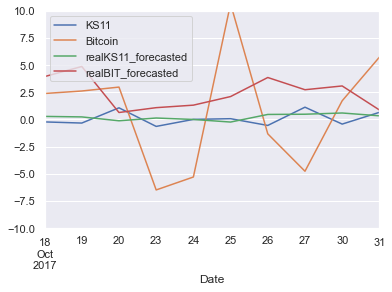

In [190]:
test = mydata_diff2[-10:]
test["realKS11_forecasted"] = forecast["realKS11_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

test.plot(ylim = (-10,10))

#test
#test.plot()

# 2기 KS11-Bitcoin 예측

In [193]:
adfuller_test = adfuller(ks_sp_coin_price2['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -13.920233417201658
p-value: 5.312112621733402e-26


In [194]:
adfuller_test = adfuller(ks_sp_coin_price2['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.542605998844811
p-value: 3.6040937574832176e-21


In [195]:
adfuller_test = adfuller(ks_sp_coin_price2['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.083992358052626
p-value: 4.2417499632057556e-20


In [196]:
mydata_diff2 = ks_sp_coin_price2.diff().dropna()
mydata_diff2

,KS11,US500,Bitcoin
Date,,,
2017-11-02,-1.704,-0.140,-0.18
2017-11-03,0.851,0.291,-2.45
2017-11-06,-0.791,-0.183,-7.63
2017-11-07,0.179,-0.146,7.88
2017-11-08,0.429,0.163,2.75
...,...,...,...
2019-12-23,-0.368,-0.407,-2.74
2019-12-24,-0.598,-0.107,1.57
2019-12-26,0.977,0.533,0.55


In [197]:
adfuller_test = adfuller(mydata_diff2['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.934332937105946
p-value: 9.645001482382668e-20


In [198]:
adfuller_test = adfuller(mydata_diff2['US500'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -9.926718890767818
p-value: 2.89390659361994e-17


In [199]:
adfuller_test = adfuller(mydata_diff2['Bitcoin'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.587548060724682
p-value: 6.656423582346981e-19


In [200]:
mydata_diff2 = mydata_diff2.loc[:, ['KS11', 'Bitcoin']]

In [201]:
train = mydata_diff2.iloc[:-10,:]
test = mydata_diff2[-10:]

In [202]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


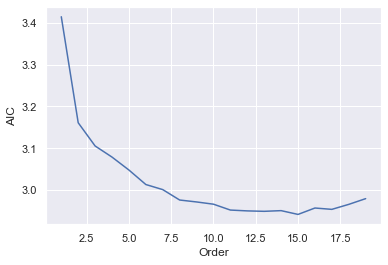

In [203]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [204]:
results = forecasting_model.fit(15)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:25:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.47336
Nobs:                     489.000    HQIC:                   3.15058
Log likelihood:          -2044.99    FPE:                    18.9565
AIC:                      2.94181    Det(Omega_mle):         16.7637
--------------------------------------------------------------------
Results for equation KS11
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.006430         0.039834            0.161           0.872
L1.KS11            -0.919874         0.046861          -19.630           0.000
L1.Bitcoin         -0.000451         0.008731           -0.052       

In [205]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realKS11_1d', 'realBIT_1d'])
forecast

,realKS11_1d,realBIT_1d
Date,,
2019-12-16,-1.149455,-2.510390
2019-12-17,0.079586,1.260032
2019-12-18,-0.335331,2.177349
2019-12-19,-0.103614,-1.294087
2019-12-20,0.032383,-0.360567
2019-12-23,0.205293,-1.133199
2019-12-24,-0.057516,0.733370
2019-12-26,0.068773,-0.277111
2019-12-27,0.128519,-0.359646


In [206]:
forecast["realKS11_forecasted"] = ks_sp_coin_price2['KS11'].dropna().iloc[-10-1] + forecast['realKS11_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price2['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realKS11_1d,realBIT_1d,realKS11_forecasted,realBIT_forecasted
Date,,,,
2019-12-16,-1.149455,-2.510390,0.389545,-1.860390
2019-12-17,0.079586,1.260032,0.469130,-0.600358
2019-12-18,-0.335331,2.177349,0.133799,1.576991
2019-12-19,-0.103614,-1.294087,0.030186,0.282905
2019-12-20,0.032383,-0.360567,0.062569,-0.077662
2019-12-23,0.205293,-1.133199,0.267862,-1.210862
2019-12-24,-0.057516,0.733370,0.210347,-0.477492
2019-12-26,0.068773,-0.277111,0.279120,-0.754603
2019-12-27,0.128519,-0.359646,0.407638,-1.114249


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

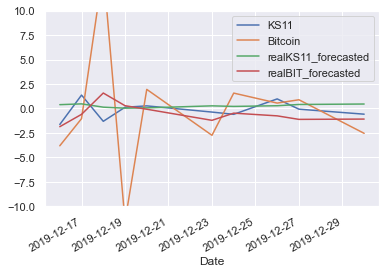

In [207]:
test = mydata_diff2[-10:]
test["realKS11_forecasted"] = forecast["realKS11_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

test.plot(ylim = (-10,10))

#test
#test.plot()

# 3기 KS11 - Bitcoin

In [208]:
adfuller_test = adfuller(ks_sp_coin_price3['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.212730001581292
p-value: 5.583224081750343e-18


In [209]:
adfuller_test = adfuller(ks_sp_coin_price3['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -5.069032889464499
p-value: 1.6174655309879695e-05


In [210]:
adfuller_test = adfuller(ks_sp_coin_price3['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.311925814658219
p-value: 0.000423556632384061


In [211]:
mydata_diff3 = ks_sp_coin_price3.diff().dropna()
mydata_diff3

,KS11,US500,Bitcoin
Date,,,
2020-01-03,1.083,-1.841,8.63
2020-01-06,-1.042,1.059,-0.16
2020-01-07,1.933,-0.633,-0.13
2020-01-08,-2.064,0.770,-6.29
2020-01-09,2.747,0.176,-1.52
...,...,...,...
2021-03-23,-0.878,-1.466,6.16
2021-03-24,0.733,0.216,-4.45
2021-03-25,0.679,1.071,1.99


In [212]:
adfuller_test = adfuller(mydata_diff3['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.225018374121777
p-value: 6.280270732472328e-13


In [213]:
adfuller_test = adfuller(mydata_diff3['Bitcoin'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.460480599610434
p-value: 5.3703931353220875e-11


In [214]:
mydata_diff3 = mydata_diff3.loc[:, ['KS11', 'Bitcoin']]

In [215]:
train = mydata_diff3.iloc[:-10,:]
test = mydata_diff3[-10:]

In [216]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


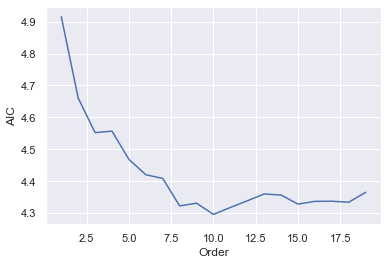

In [217]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [218]:
results = forecasting_model.fit(10)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:26:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.84684
Nobs:                     276.000    HQIC:                   4.51699
Log likelihood:          -1334.09    FPE:                    73.4420
AIC:                      4.29591    Det(Omega_mle):         63.4235
--------------------------------------------------------------------
Results for equation KS11
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.004022         0.104915           -0.038           0.969
L1.KS11            -0.990329         0.062380          -15.876           0.000
L1.Bitcoin          0.055256         0.023179            2.384       

In [219]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realKS11_1d', 'realBIT_1d'])
forecast

,realKS11_1d,realBIT_1d
Date,,
2021-03-16,0.490722,7.350772
2021-03-17,-0.175866,-0.689509
2021-03-18,-0.476621,-0.658839
2021-03-19,-0.472648,-2.808641
2021-03-22,0.209045,3.863981
2021-03-23,0.700290,-2.203931
2021-03-24,-0.552098,1.904906
2021-03-25,1.067273,0.046166
2021-03-26,-0.394481,-0.268513


In [220]:
forecast["realKS11_forecasted"] = ks_sp_coin_price3['KS11'].dropna().iloc[-10-1] + forecast['realKS11_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price3['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realKS11_1d,realBIT_1d,realKS11_forecasted,realBIT_forecasted
Date,,,,
2021-03-16,0.490722,7.350772,0.206722,1.730772
2021-03-17,-0.175866,-0.689509,0.030856,1.041263
2021-03-18,-0.476621,-0.658839,-0.445765,0.382424
2021-03-19,-0.472648,-2.808641,-0.918412,-2.426217
2021-03-22,0.209045,3.863981,-0.709367,1.437764
2021-03-23,0.700290,-2.203931,-0.009077,-0.766166
2021-03-24,-0.552098,1.904906,-0.561175,1.138740
2021-03-25,1.067273,0.046166,0.506098,1.184905
2021-03-26,-0.394481,-0.268513,0.111617,0.916393


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

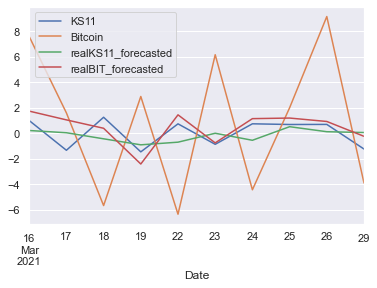

In [221]:
test = mydata_diff3[-10:]
test["realKS11_forecasted"] = forecast["realKS11_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

#test.plot(ylim = (-10,10))

#test
test.plot()